<a href="https://colab.research.google.com/github/sivasuryabscit/Marketing-Campaign-Performance-Analysis-Project/blob/main/Marketing_Campaign_Performance_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the Dataset
data_url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
try:
    df = pd.read_csv(data_url)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()

Dataset loaded successfully.


In [2]:
# 2) Descriptive Analysis
print("\n2) Descriptive Analysis")
print("\nBasic Structure:")
print("First few rows of the dataset:")
print(df.head())
print("\nNumber of rows and columns:", df.shape)
print("\nConcise summary of the dataset:")
print(df.info())
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nData Exploration:")
print("Number of unique Campaign_ID values:", df['Campaign_ID'].nunique())
print("\nUnique values of the Location column:", df['Location'].unique())
print("\nUnique values of the Customer_Segment column:", df['Customer_Segment'].unique())
print("\nCount of each category in Campaign_Type:")
print(df['Campaign_Type'].value_counts())
print("\nCount of each category in Channel_Used:")
print(df['Channel_Used'].value_counts()) # Corrected column name


2) Descriptive Analysis

Basic Structure:
First few rows of the dataset:
   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82     


3) Exploratory Data Analysis (EDA) and Visualization


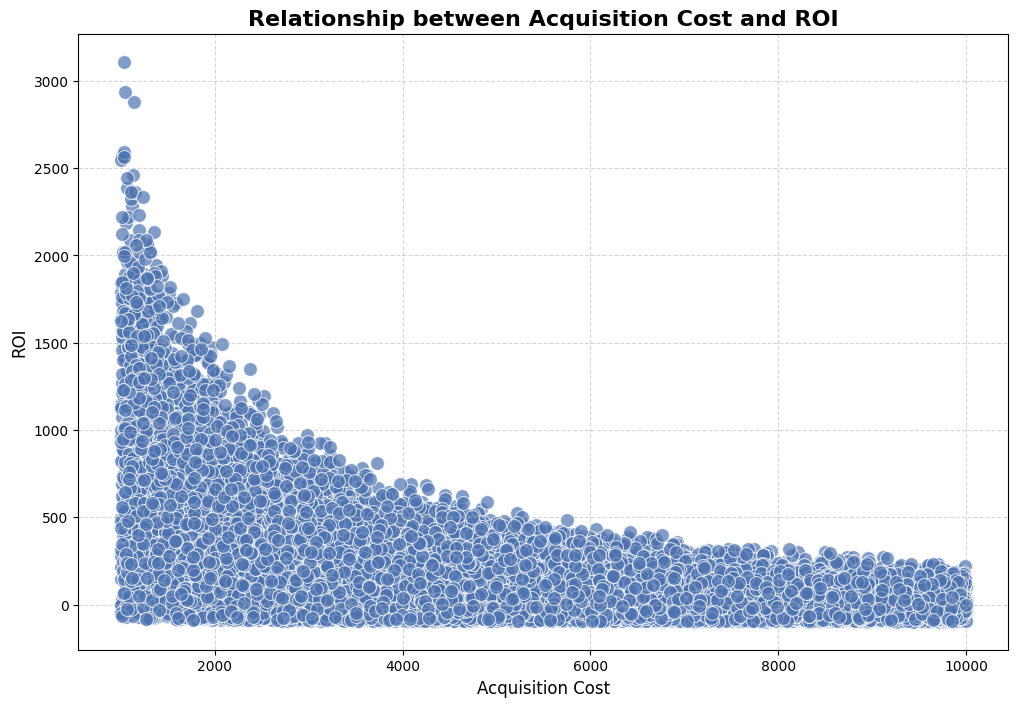

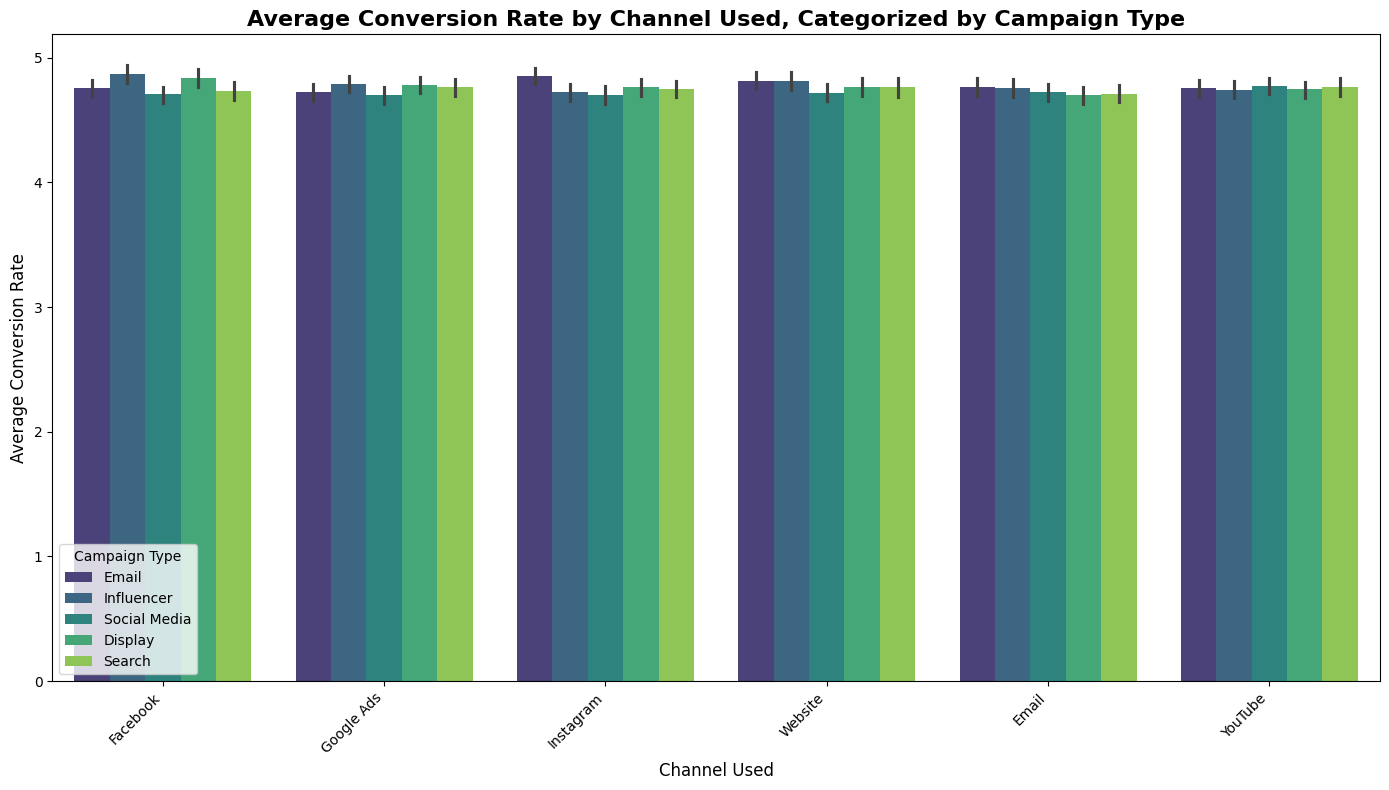

<ipython-input-3-b3b02d4cfef3>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df, palette='muted')


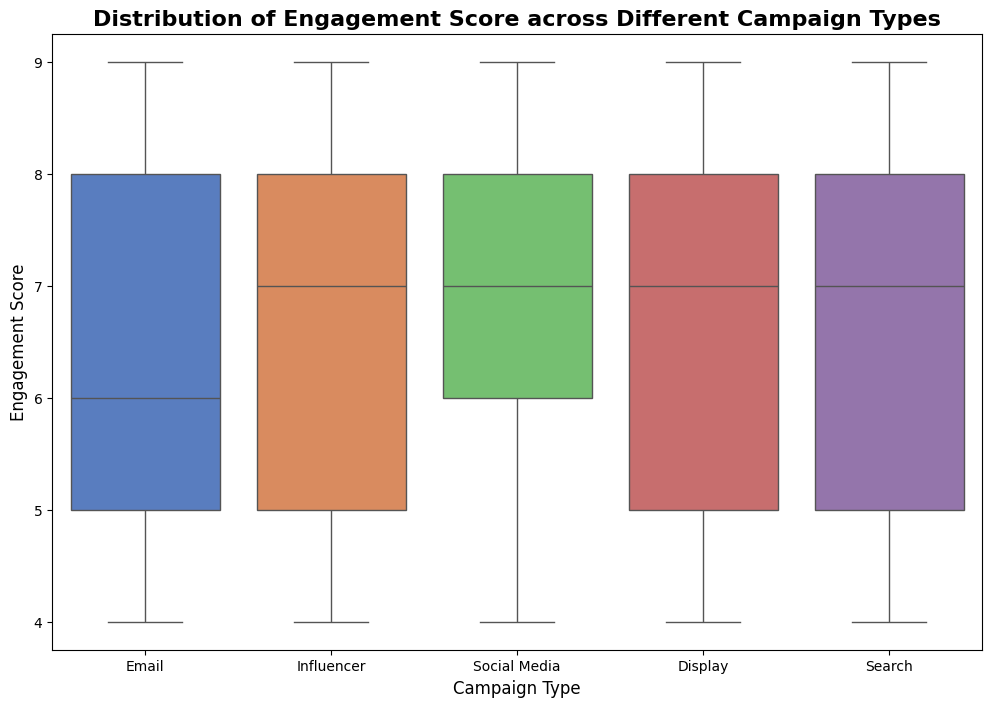

<ipython-input-3-b3b02d4cfef3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='ROI', data=df, palette='plasma')


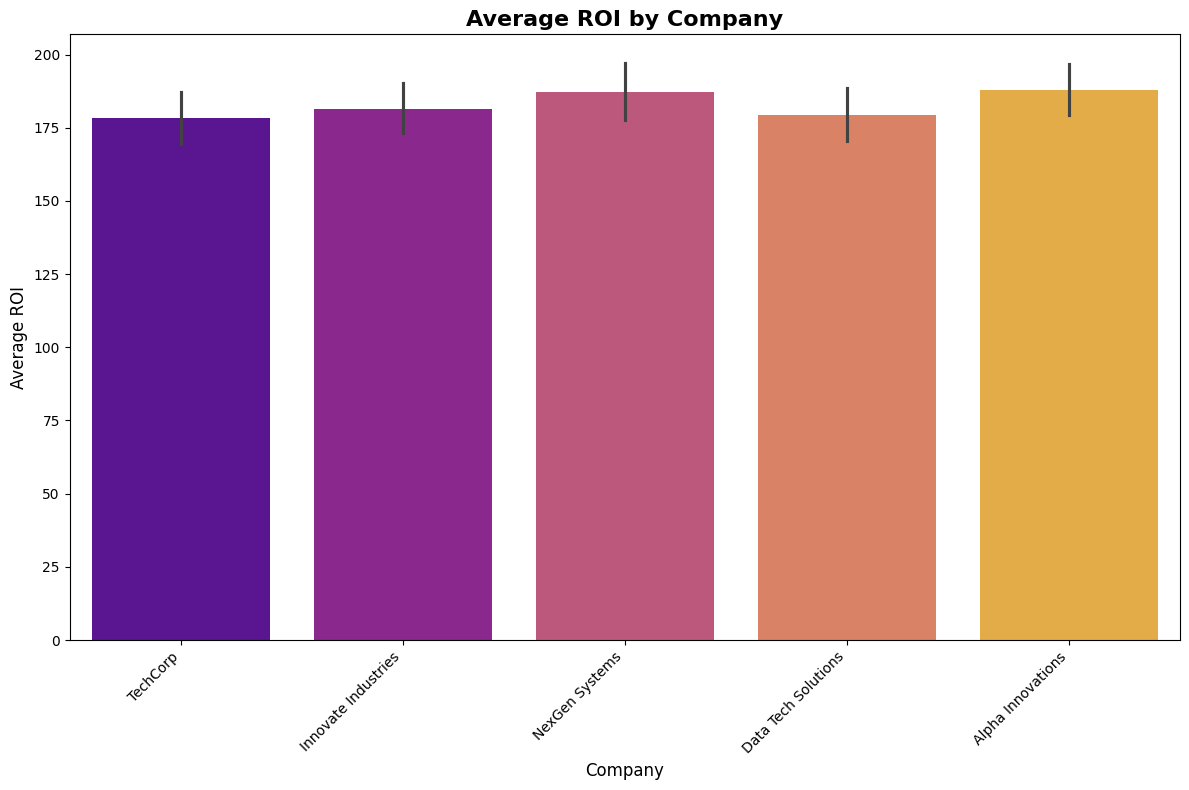

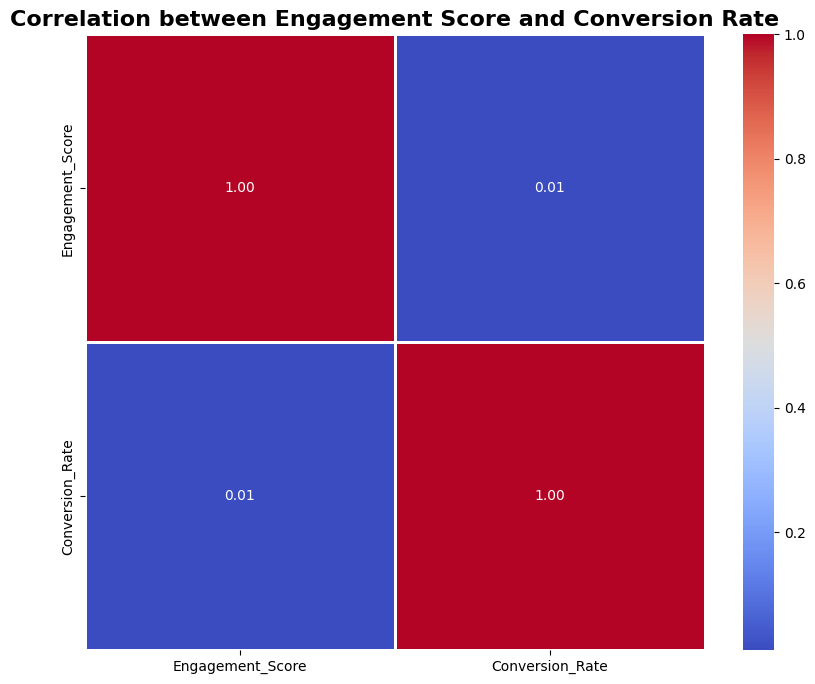

In [3]:
# 3) Exploratory Data Analysis (EDA) and Visualization
print("\n3) Exploratory Data Analysis (EDA) and Visualization")

# Campaign Performance:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Acquisition_Cost', y='ROI', data=df, s=100, alpha=0.7, color="#4c72b0")
plt.title('Relationship between Acquisition Cost and ROI', fontsize=16, fontweight='bold')
plt.xlabel('Acquisition Cost', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df, palette='viridis') # Corrected column name
plt.title('Average Conversion Rate by Channel Used, Categorized by Campaign Type', fontsize=16, fontweight='bold')
plt.xlabel('Channel Used', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Campaign Type', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df, palette='muted')
plt.title('Distribution of Engagement Score across Different Campaign Types', fontsize=16, fontweight='bold')
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='ROI', data=df, palette='plasma')
plt.title('Average ROI by Company', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, linecolor='white')
plt.title('Correlation between Engagement Score and Conversion Rate', fontsize=16, fontweight='bold')
plt.show()

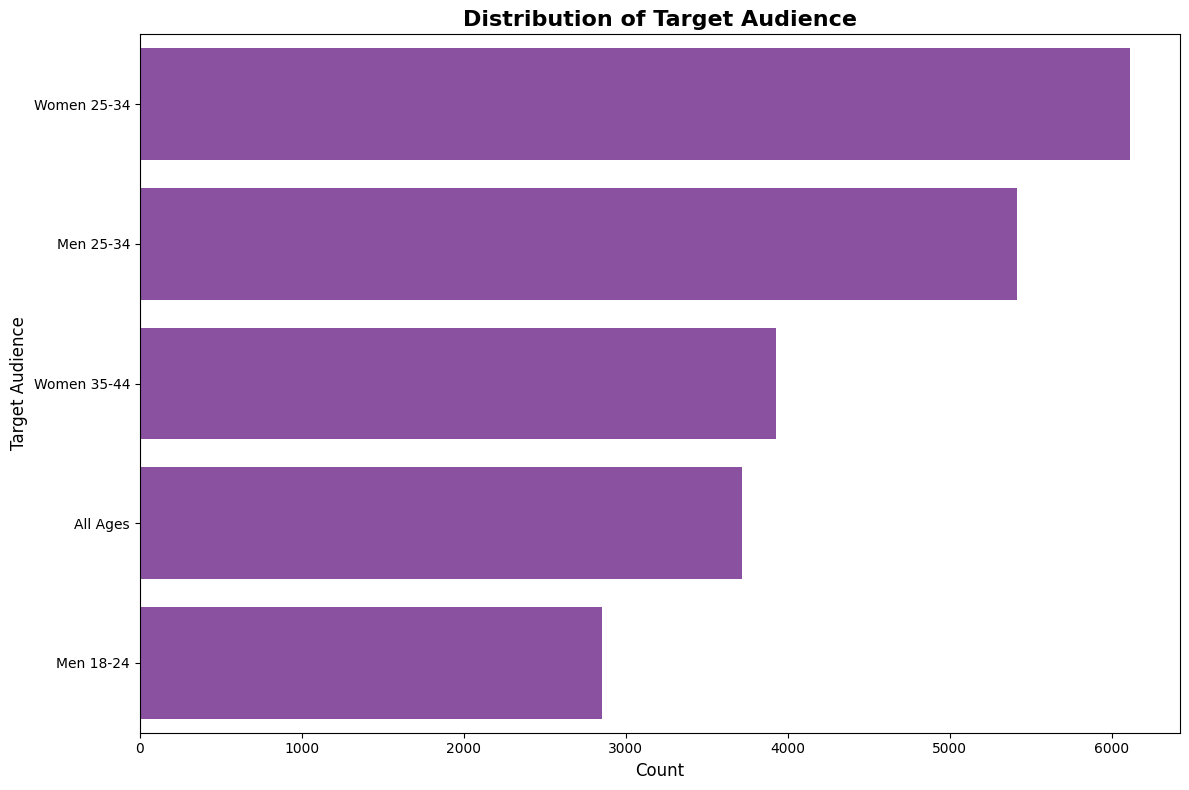

<ipython-input-4-bc4889531779>:12: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = highest_conversion.groupby(['Language'])['Conversion_Rate'].transform(max) == highest_conversion['Conversion_Rate']


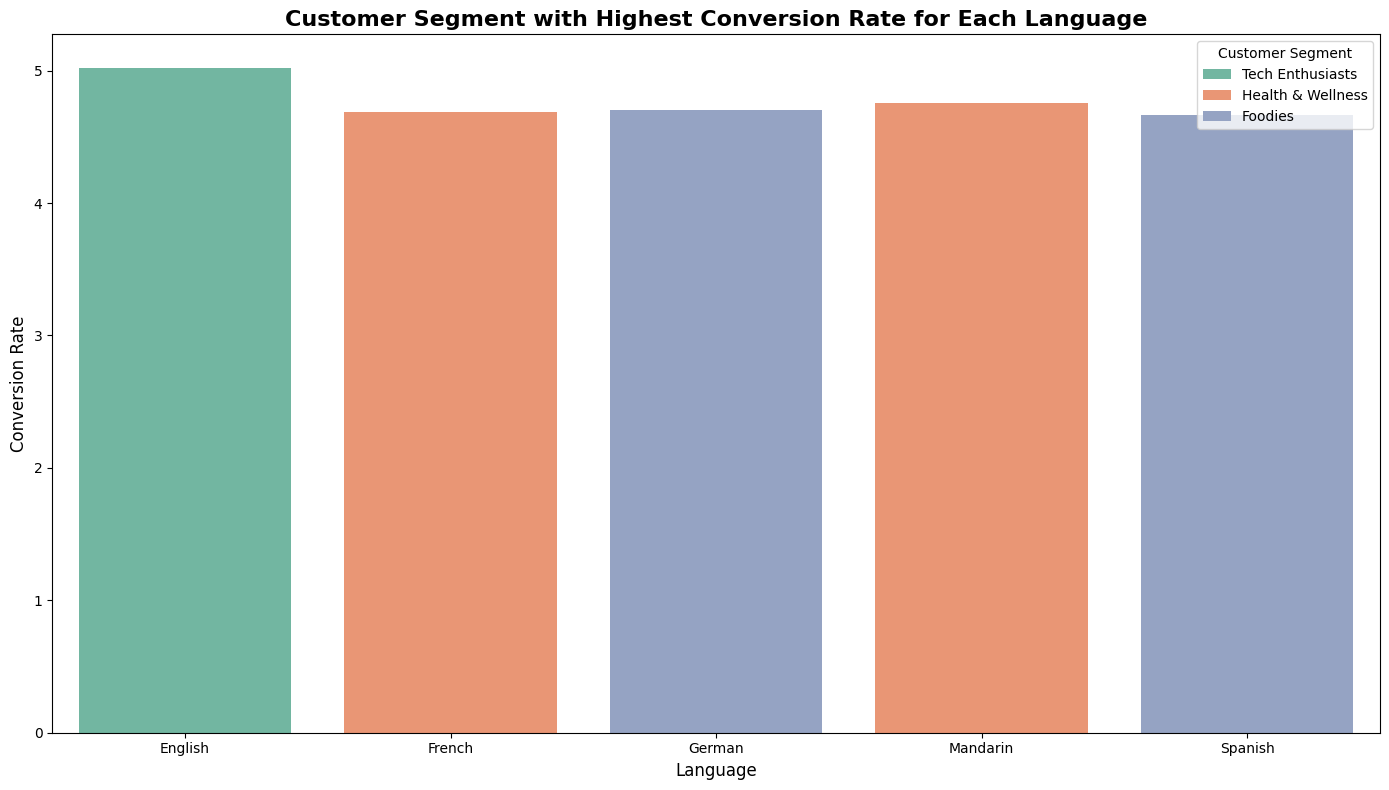

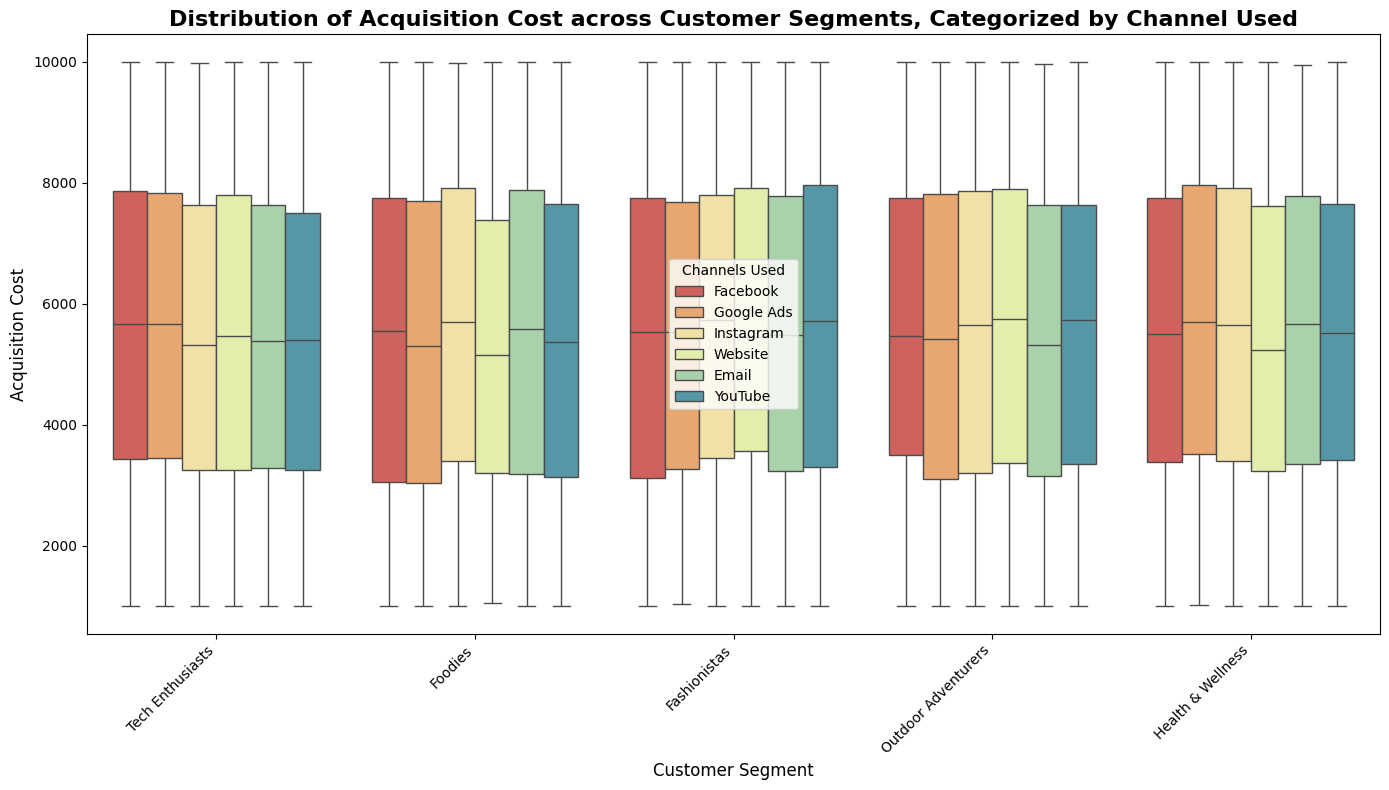

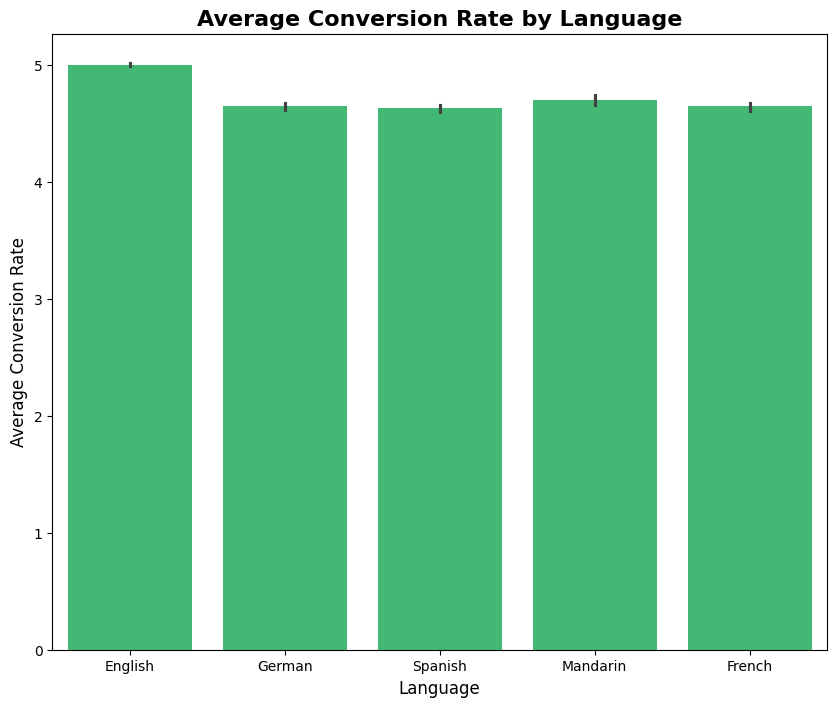

In [4]:
# Customer Segmentation:
plt.figure(figsize=(12, 8))
sns.countplot(y='Target_Audience', data=df, order=df['Target_Audience'].value_counts().index, color="#8e44ad")
plt.title('Distribution of Target Audience', fontsize=16, fontweight='bold')
plt.ylabel('Target Audience', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
highest_conversion = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().reset_index()
idx = highest_conversion.groupby(['Language'])['Conversion_Rate'].transform(max) == highest_conversion['Conversion_Rate']
highest_conversion = highest_conversion[idx]
sns.barplot(x='Language', y='Conversion_Rate', hue='Customer_Segment', data=highest_conversion, palette='Set2')
plt.title('Customer Segment with Highest Conversion Rate for Each Language', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.legend(title='Customer Segment', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=df, palette='Spectral') # Corrected column name
plt.title('Distribution of Acquisition Cost across Customer Segments, Categorized by Channel Used', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Acquisition Cost', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Channels Used', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='Language', y='Conversion_Rate', data=df, color="#2ecc71")
plt.title('Average Conversion Rate by Language', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.show()

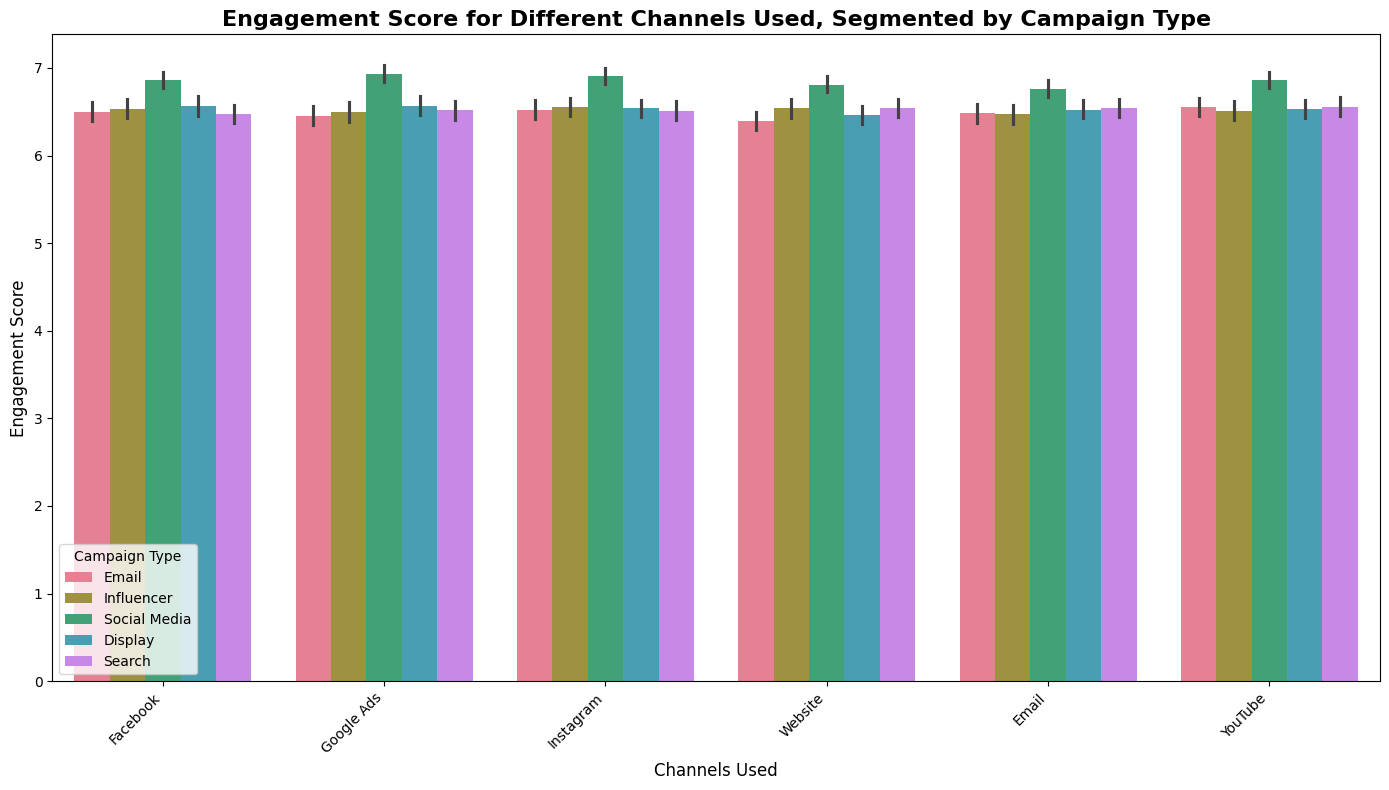

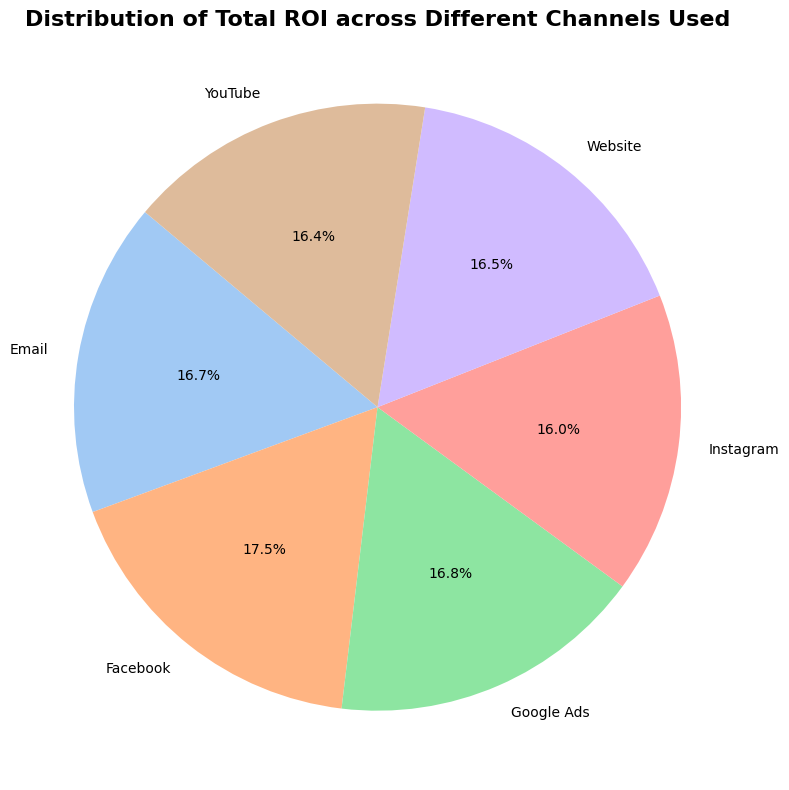

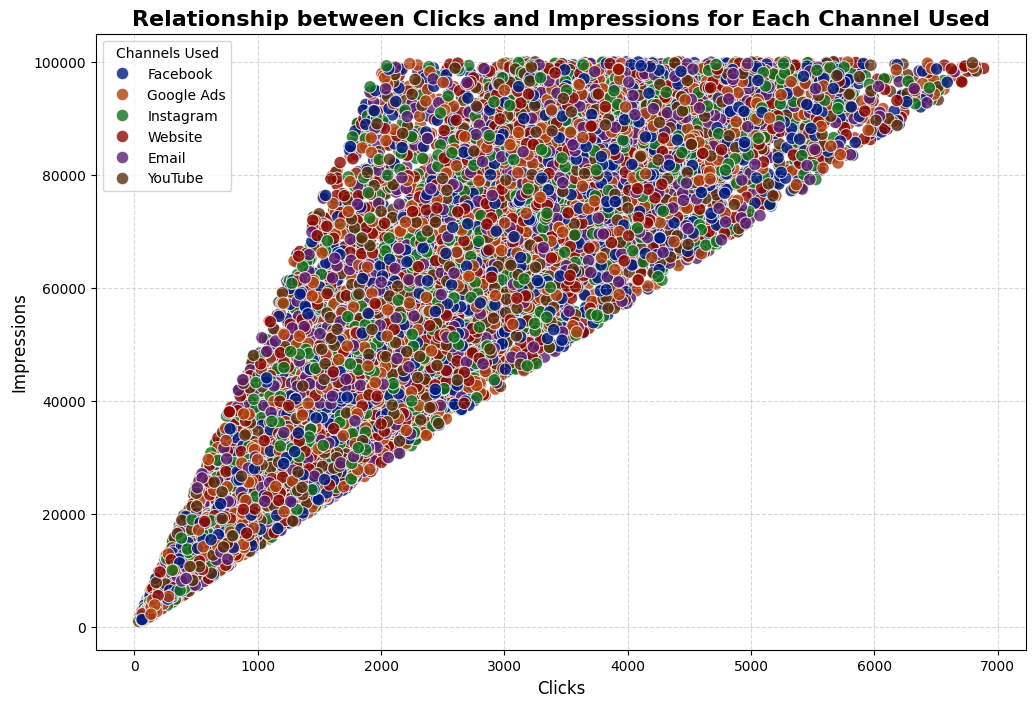

In [5]:
# Channel Effectiveness:
plt.figure(figsize=(14, 8))
sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=df, palette='husl') # Corrected column name
plt.title('Engagement Score for Different Channels Used, Segmented by Campaign Type', fontsize=16, fontweight='bold')
plt.xlabel('Channels Used', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Campaign Type', fontsize=10)
plt.tight_layout()
plt.show()

roi_by_channel = df.groupby('Channel_Used')['ROI'].sum() # Corrected column name
plt.figure(figsize=(8, 8))
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total ROI across Different Channels Used', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df, palette='dark', s=80, alpha=0.8) # Corrected column name
plt.title('Relationship between Clicks and Impressions for Each Channel Used', fontsize=16, fontweight='bold')
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.legend(title='Channels Used', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

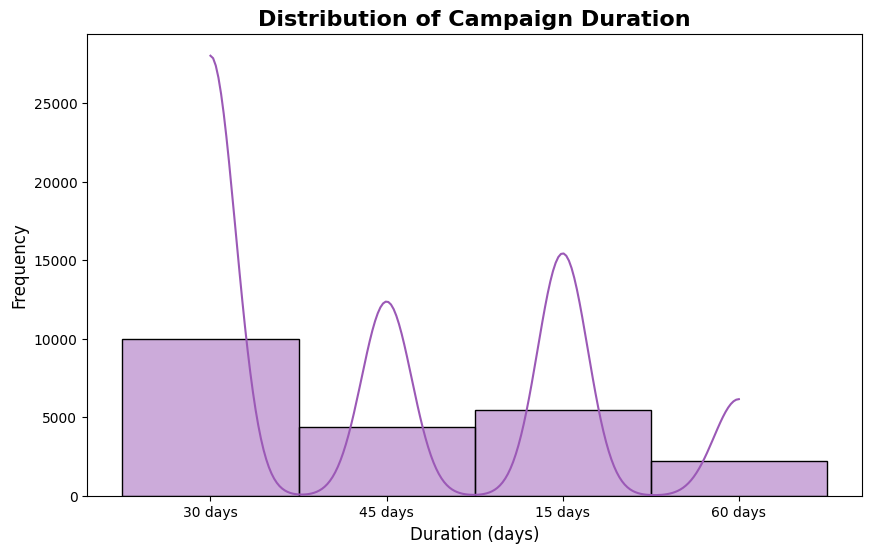

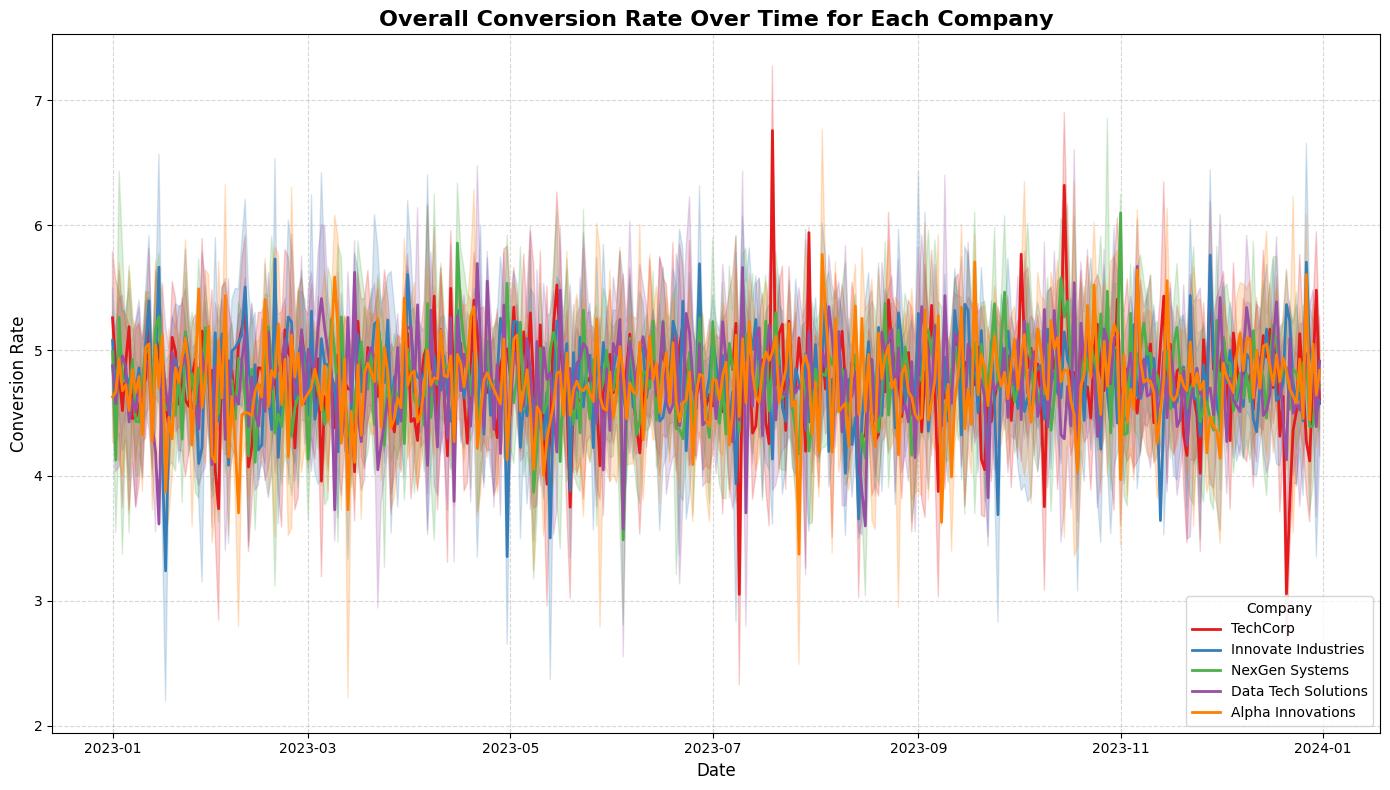

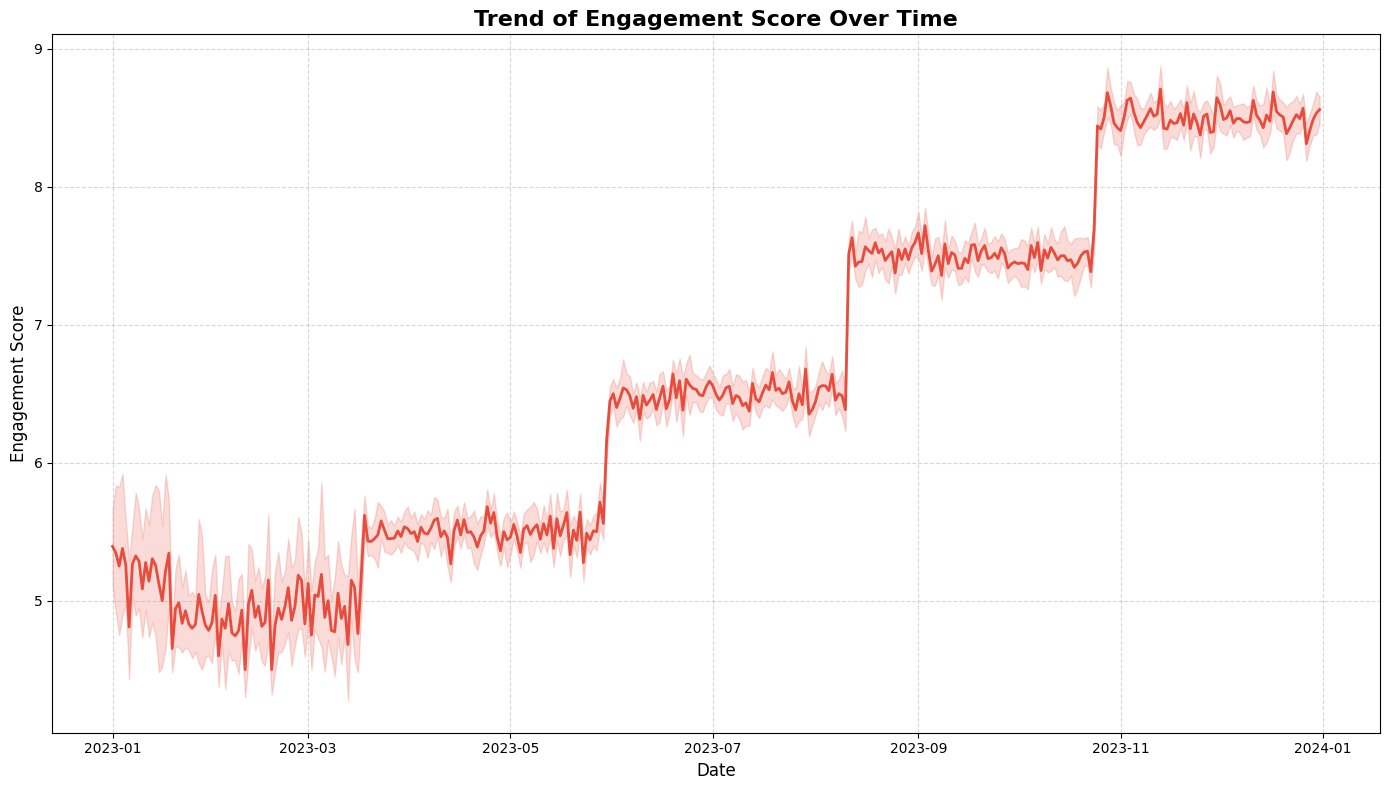

In [6]:
# Time-Based Analysis:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=True, color="#9b59b6")
plt.title('Distribution of Campaign Duration', fontsize=16, fontweight='bold')
plt.xlabel('Duration (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Convert 'Date' column to datetime objects
#df['Date'] = pd.to_datetime(df['Date']) # Removed the problematic line
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Added this line, specifying the correct format

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=df, palette='Set1', linewidth=2)
plt.title('Overall Conversion Rate Over Time for Each Company', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.legend(title='Company', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Engagement_Score', data=df, color="#e74c3c", linewidth=2)
plt.title('Trend of Engagement Score Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

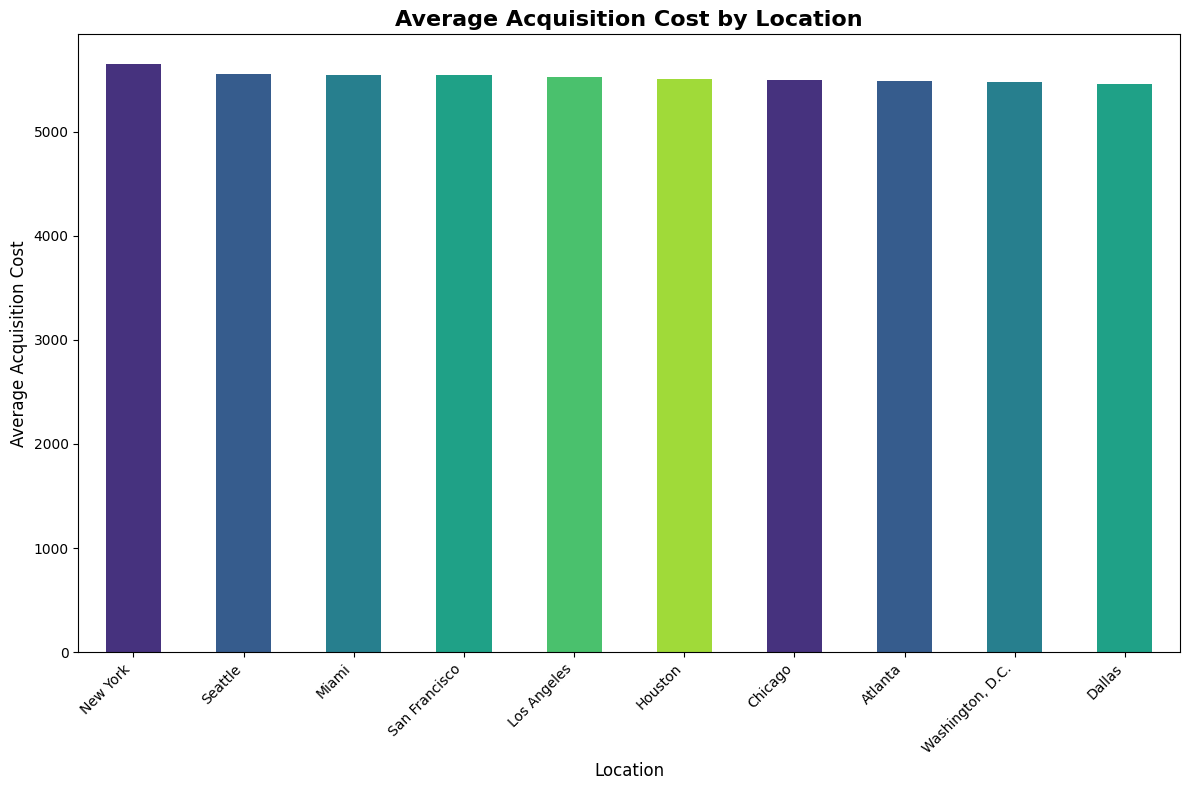

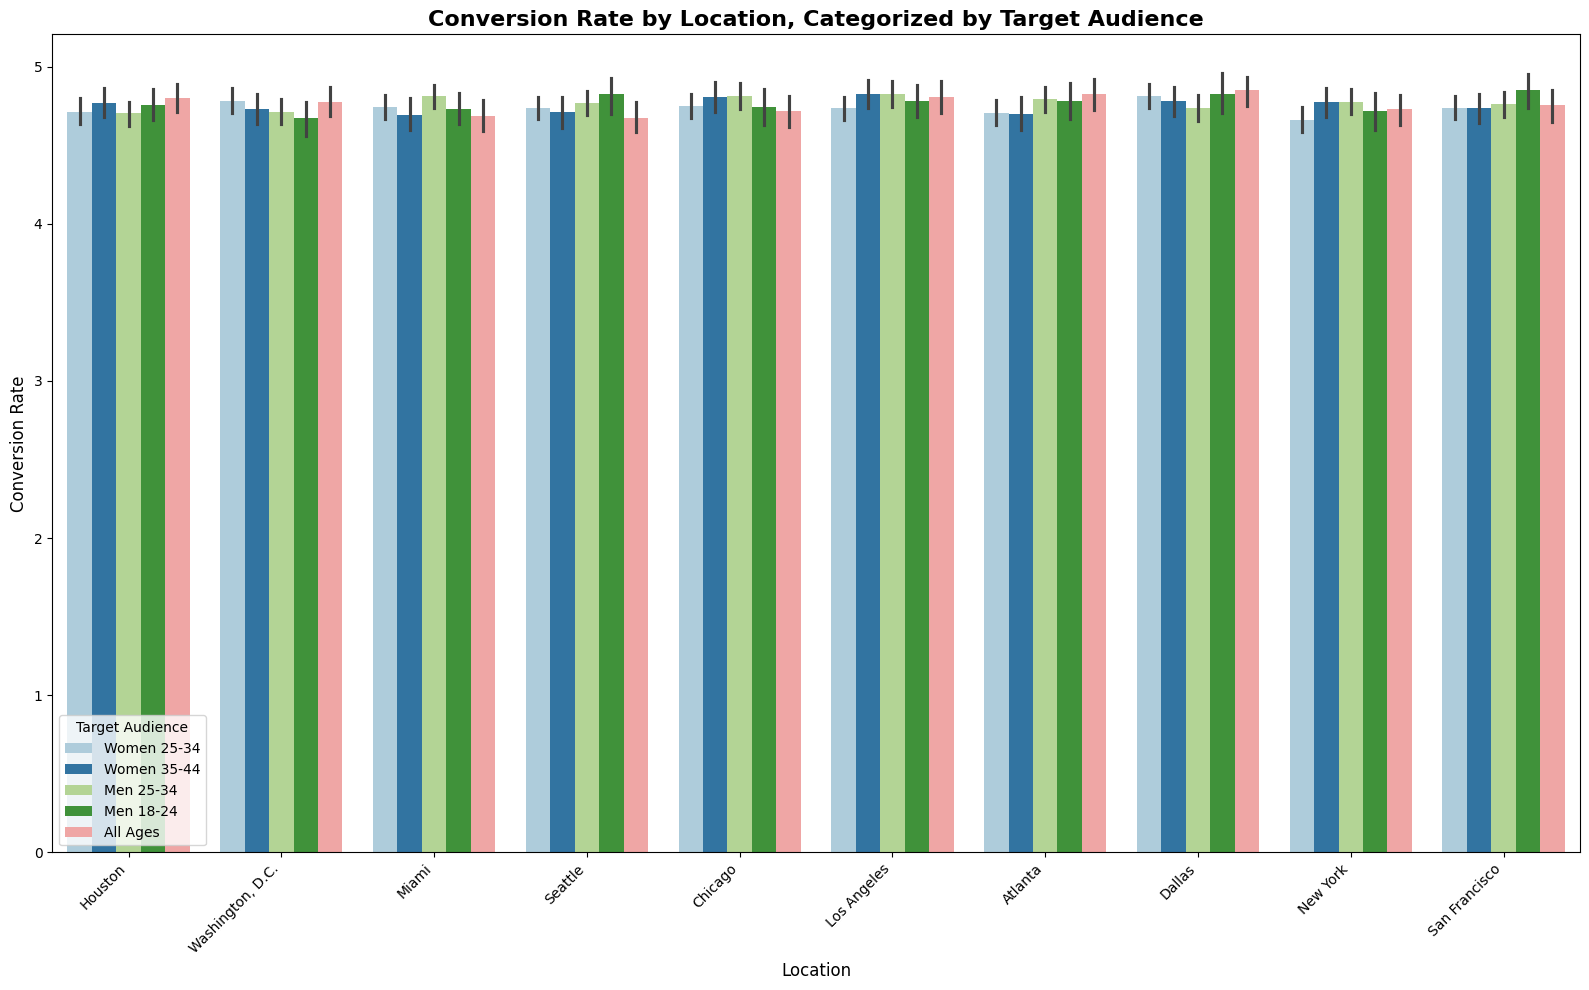

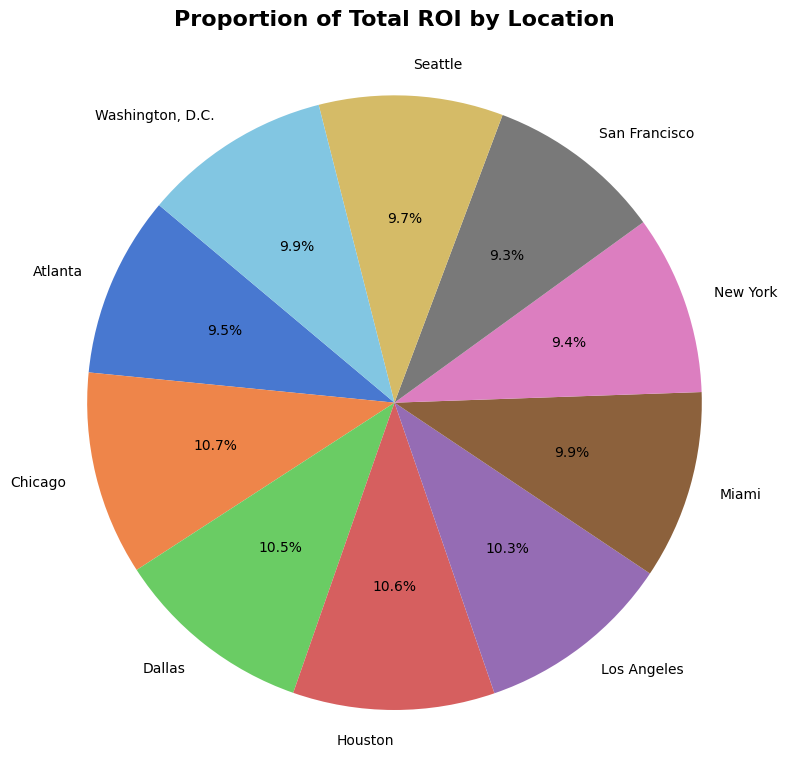

In [7]:
# Geographic Analysis:
plt.figure(figsize=(12, 8))
avg_acquisition_cost_by_location = df.groupby('Location')['Acquisition_Cost'].mean().sort_values(ascending=False)
avg_acquisition_cost_by_location.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Average Acquisition Cost by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Acquisition Cost', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=df, palette='Paired')
plt.title('Conversion Rate by Location, Categorized by Target Audience', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Target Audience', fontsize=10)
plt.tight_layout()
plt.show()

roi_by_location = df.groupby('Location')['ROI'].sum()
plt.figure(figsize=(8, 8))
plt.pie(roi_by_location, labels=roi_by_location.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Proportion of Total ROI by Location', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()